 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 02 - Regression : </b> Welcome to the programming assignment (PA) on regression. This programing assignment focuses on understanding the basic concepts of linear regression.


<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.


<center> <h2> <b> Understanding Basic Concepts </b> </h2> </center>


<b> Part - (1) :  Understanding Error Surfaces </b>

According to www.geogebra.org, the relationship between human height (in
inches) and weight (in pounds) is given by <br>
<center> $t = 3.86x - 110.42$ </center>

(a) Generate 25 meaningful data points from this relationship, mimicking a
noisy sensor, where the noise follows a zero mean Gaussian with a variance
of 20. Plot the scatter plot of the data. <br>
(b) Now, we need to estimate the above relationship from the noisy data
generated in (a) by fitting a line, i.e $\hat{t} = y(x,w) = w_{0} + w_{1}x$. Let us use least squares criterion discussed in the class to estimate the parameters $w_{0}$ and $w_{1}$. Generate and plot the error surface $J(w_{0},w_{1})$ associated with this approach. Locate the minimum on this error surface.<br>

(c) Estimate the parameters using least squares approach, and compare them
with the desired values.
<center> $\textbf{w}_{opt} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{t}$</center>

(d) Report all your observations

<b> Part - (2) : Understanding model order and overfitting  </b>

(a). Generate  20  data  points  from $t_{n} = sin(2πx_{n}) + e_{n}$, where $x_{n} \in [0,1] $ and $e_{n} \thicksim \mathcal{N} (0,0.1)$ , and divide them into two sets, a training set and a testing set, with each set containing 10 points <br>

(b). Fit  an $M^{th}$ degree  polynomial  to  the  training  data  using  least  squares approach, i.e.,
<center> $\hat{t_{n}} = w_{0} + w_{1}x + .... +  w_{m}x^{m} + ... + w_{M}x^{M} $ </center>

Use the estimated parameter vector $\textbf{w}$, to predict the target values in training and testing datasets.  Plot the root mean squared error associated with each dataset, for M=0,1,...,9. Explain your results. <br>

(c) Increase the size of the training dataset to 100 points, and repeat (b). <br>

(d) Add a $l_{2}$ regularization term to the objective function in (b) and repeat (b) and (c).  Study the affect of Lagrange multiplier λ on the root mean squared error of the training and testing datasets <br>

(e) Modify the function in (a) to $t_{n}=5+sin(2πx_{n})+e_{n}$ to study the effect of regularizing the bias coefficient $w_{0}$.

(f) Report all your observations

<b> Part - (3) : Understanding the choice of kernel  </b>


(a). Generate 100 data points from $t_{n}=sin(2πx_{n})+e_{n}$, where $x_{n} \in [0 1]$ and $e_{n} \thicksim \mathcal{N}(0,0.1)$, and divide them into two sets, a training set and a testing test each containing 50 points.  Fit an $M^{th}$ degree polynomial using polynomial,Gaussian and sigmoidal kernels, and study the goodness of fit in each case, for different model orders M

(b). Repeat (a) by modifying the target function to <br>
<center> $t_{n} = $ $\begin{cases}
 \text{sinusoid} + e_{n} , \;\; where \;\; x  \in [0,1) \\
 \text{triangle} + e_{n} , \;\; where \;\; x  \in [1,2) \\
 \text{Gaussian} + e_{n} , \;\; where \;\; x  \in [2,3) \\
\end{cases}$ </center>

Clearly discuss your observations/results for each of the three kernels.

(c). Report all your observations

<b> Part - (4) : Understanding online training  </b>

(a). Repeat 3(a) and 3(b) using stochastic gradient descent for weight update.Study the effect of step size η on convergence of the weights, and compare them to those obtained using closed form expressions in 3.  Plot the mse as a  function  of  iterations.

(b). Study the effect of batch size on the speed of convergence

(c). Report all your observations

<b> Part - (5) : Understanding bias-variance trade-off  </b>

(a). Generate L=100 datasets of noisy sinusoidal data, each having N=25  datapoints. For each dataset, fit a $M=25^{th}$ order linear regression model consisting of 24 Gaussian basis functions and one bias parameter.  Use regularized least squares, governed by the parameter λ, to estimate the parameters $\textbf{w}$. Illustrate the concept of bias and variance using these 100 different parameter fits.
1.   Chose three different regularization coefficeints (low,middle and high)
2. For every regularization coefficient, produce two plots: one displaying 100 estimated curves, and the other showing the mean of the estimated curves alongside the original function.
2. For three regularization coefficients, you should have a total of six plots, meaning two plots for each regularization.
3. Using the six plots above, describe the bias-variance trade-off.


(b). Report all your observations







<b> Part - (6) : Understanding
Maximum a Posteriori (MAP) estimate  </b>

(a). Generate 100 noisy data points of a sinusoid. Fit a $20^{th}$  order  linear regression  model  with  Gaussian  basis  functions. Starting from a standard normal prior, update the statistics of the posterior density of the parameters using Bayesian sequential updates.

(b). Sample a parameter vector from the posterior distribution, and obtain the curve fit for this realization. Repeat this for several times, and estimate the average of these curve fits, and compare it with the original sinusoid

(c). Use the posterior distribution of the parameters to evaluate the predictive distribution of target $p(t_{0}/x_{0},X,t)$, and plot it for different number of training data points, as discussed in the class.

(d). Report all your observations

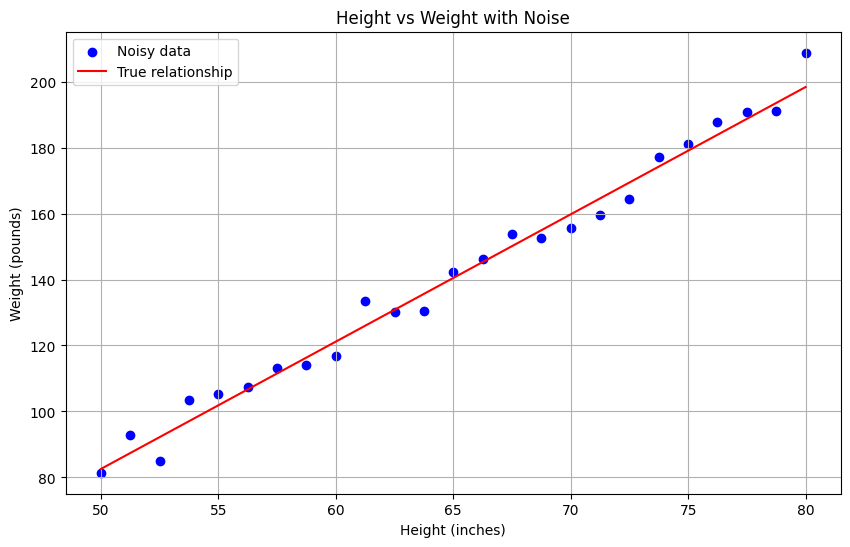

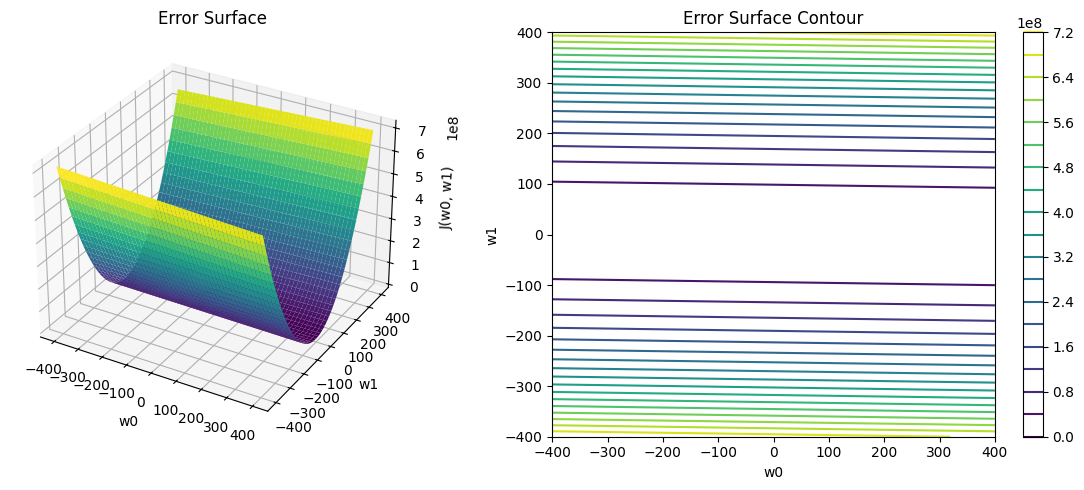

Minimum from error surface: w0 = -119.69, w1 = 4.00
Least squares estimate: w0 = -112.23, w1 = 3.90


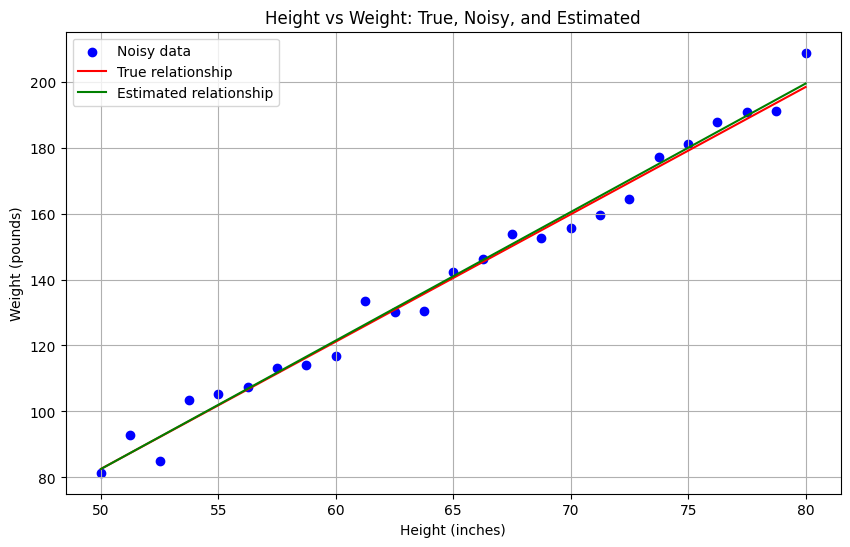

Comparison of estimates:
Error surface: w0 = -119.69, w1 = 4.00
Least squares: w0 = -112.23, w1 = 3.90
True values:   w0 = -110.42, w1 = 3.86


In [14]:
#Understanding Error Surface
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


########################################
#Generate meaningful data
########################################
#np.random.seed(44)  # for reproducibility
x = np.linspace(50, 80, 25) #height in inches
t_true = 3.86 * x - 110.42 #weight in pounds - ground truth
t = t_true + np.random.normal(0, np.sqrt(20), 25) #weight in pounds - noisy data

########################################
#Plot scatter plot of data
########################################
plt.figure(figsize=(10, 6))
plt.scatter(x, t, color='blue', label='Noisy data')
plt.plot(x, t_true, color='red', label='True relationship')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight with Noise')
plt.legend()
plt.grid(True)
plt.show()

########################################
#Weight estimation through error surface, i.e., empirically locate the minima of error surface
########################################
#Sample a bunch of w's around w_opt and compute the associated error
w0 = np.linspace(-400, 400, 900)
w1 = np.linspace(-400, 400, 900) #chose w1 range based on true value and similarly w0
W0, W1 = np.meshgrid(w0, w1)

#Compute the error
def Error(w, t, x):
    #Estimate the target
    y = w[0] + w[1] * x
    #Compute and return the error
    error = np.mean((t - y)**2)
    return error

#Plot 3D error surface and the corresponding contour plots
#Error surface is a function of w0 and w1
J = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        J[i,j] = Error([W0[i,j], W1[i,j]], t, x)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W0, W1, J, cmap='viridis')
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('J(w0, w1)')
ax1.set_title('Error Surface')

ax2 = fig.add_subplot(122)
contour = ax2.contour(W0, W1, J, levels=20)
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')
ax2.set_title('Error Surface Contour')
plt.ylim(-400, 400)
plt.xlim(-400, 400)
plt.colorbar(contour)
plt.tight_layout()
plt.show()

#Locate the minima of the error surface
min_idx = np.unravel_index(np.argmin(J), J.shape)
w0_min, w1_min = W0[min_idx], W1[min_idx]
print(f"Minimum from error surface: w0 = {w0_min:.2f}, w1 = {w1_min:.2f}")

########################################
#Least squares approach to estimate the weights
########################################
#Complete the below linear regression function
def LinearRegression(x, t):
    X = np.column_stack((np.ones_like(x), x))
    w_opt = np.linalg.inv(X.T @ X) @ X.T @ t
    return w_opt

#Estimate optimal weight's using "LinearRegression" function
w_opt = LinearRegression(x, t)
print(f"Least squares estimate: w0 = {w_opt[0]:.2f}, w1 = {w_opt[1]:.2f}")

#Estimate the targets using the input x and the estimated weights
t_est = w_opt[0] + w_opt[1] * x

#Plot the estimated line on top of the above scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, t, color='blue', label='Noisy data')
plt.plot(x, t_true, color='red', label='True relationship')
plt.plot(x, t_est, color='green', label='Estimated relationship')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Height vs Weight: True, Noisy, and Estimated')
plt.legend()
plt.grid(True)
plt.show()

########################################
#Compare the estimated weight's using least squares approach with the error surface approach
########################################
print("Comparison of estimates:")
print(f"Error surface: w0 = {w0_min:.2f}, w1 = {w1_min:.2f}")
print(f"Least squares: w0 = {w_opt[0]:.2f}, w1 = {w_opt[1]:.2f}")
print(f"True values:   w0 = -110.42, w1 = 3.86")


<b> Report your observations </b>

1. The weights are close to true values as expected and slightly deviates due to noise

2. The minimum point of the convex error surface gives the optimal parameters that minimize the sum of squared errors.

3. The error surface countour is highly elongated, indicating correlation between parameters



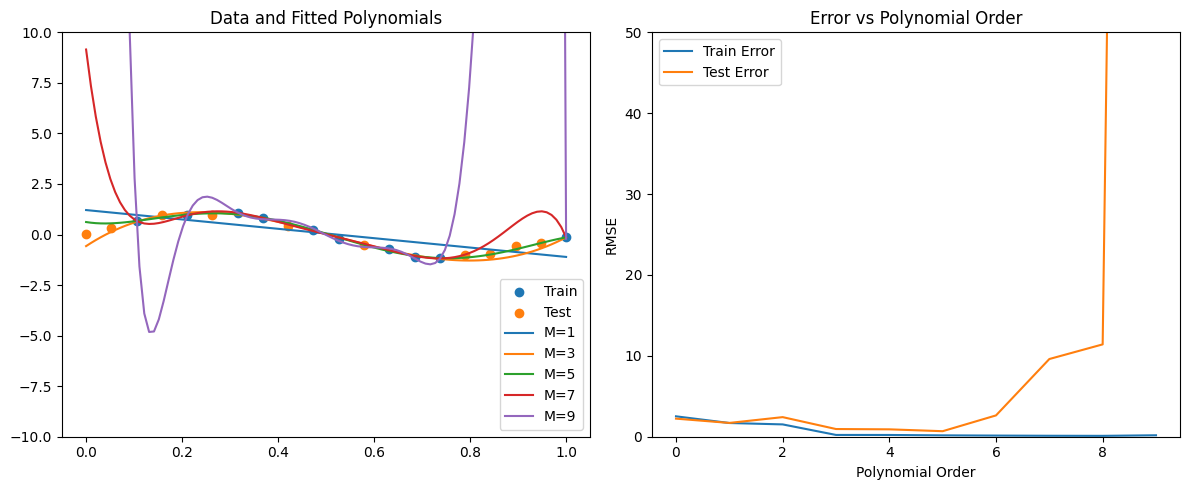

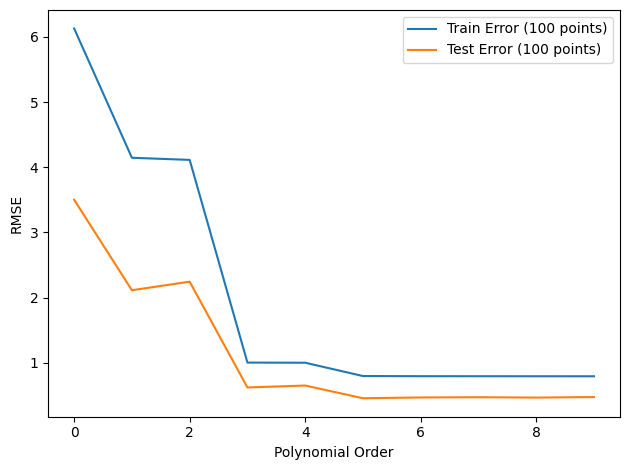

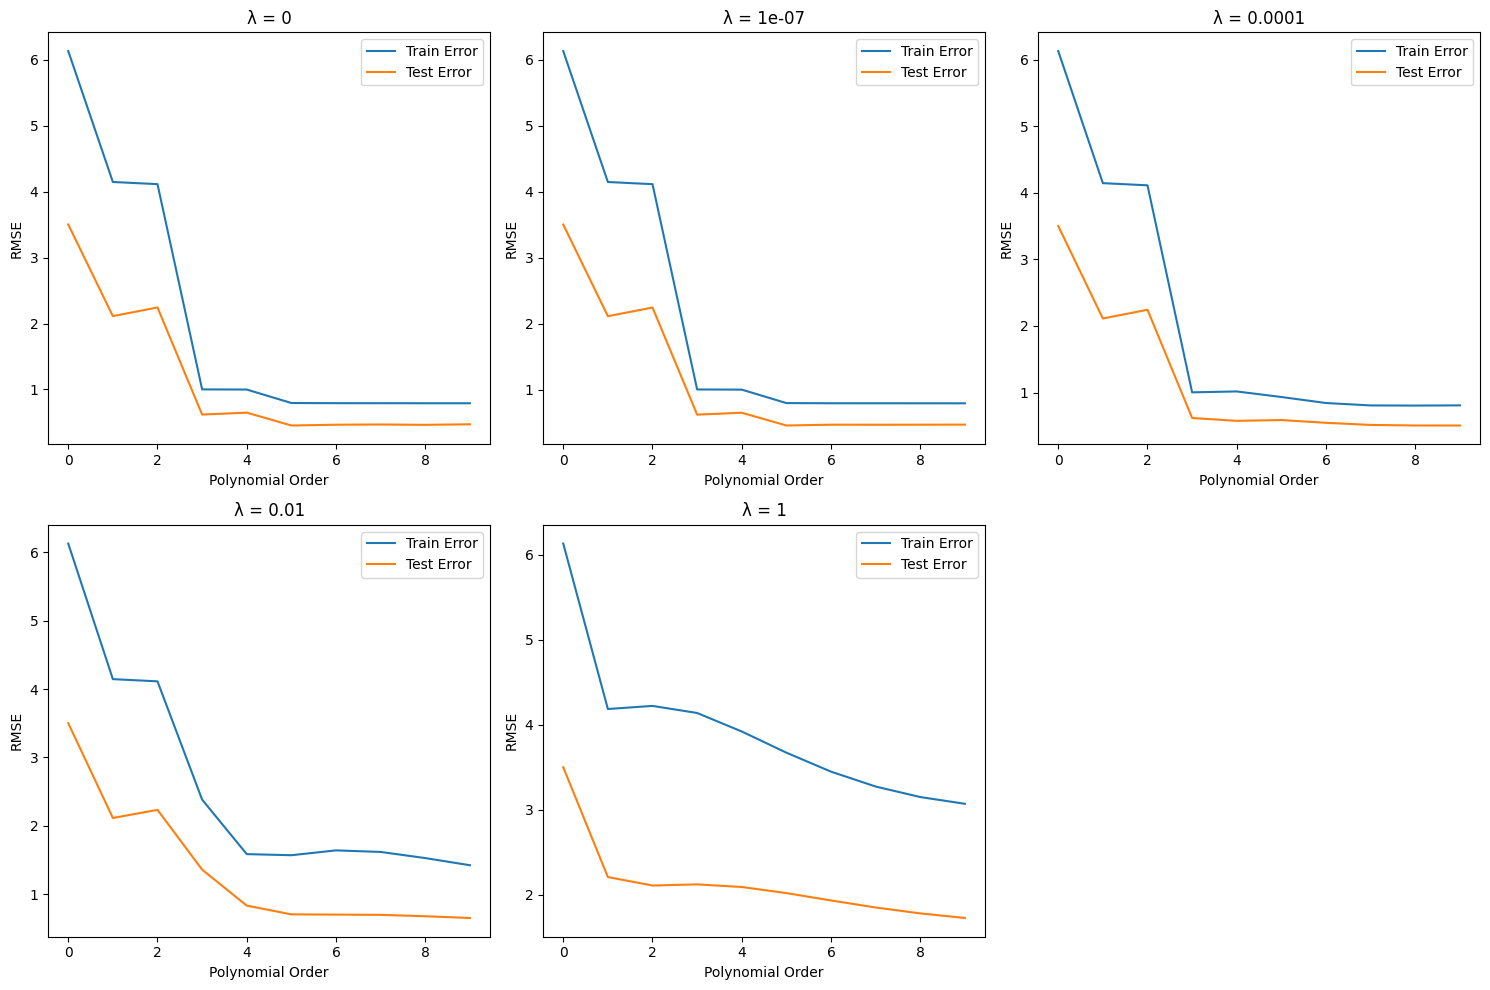

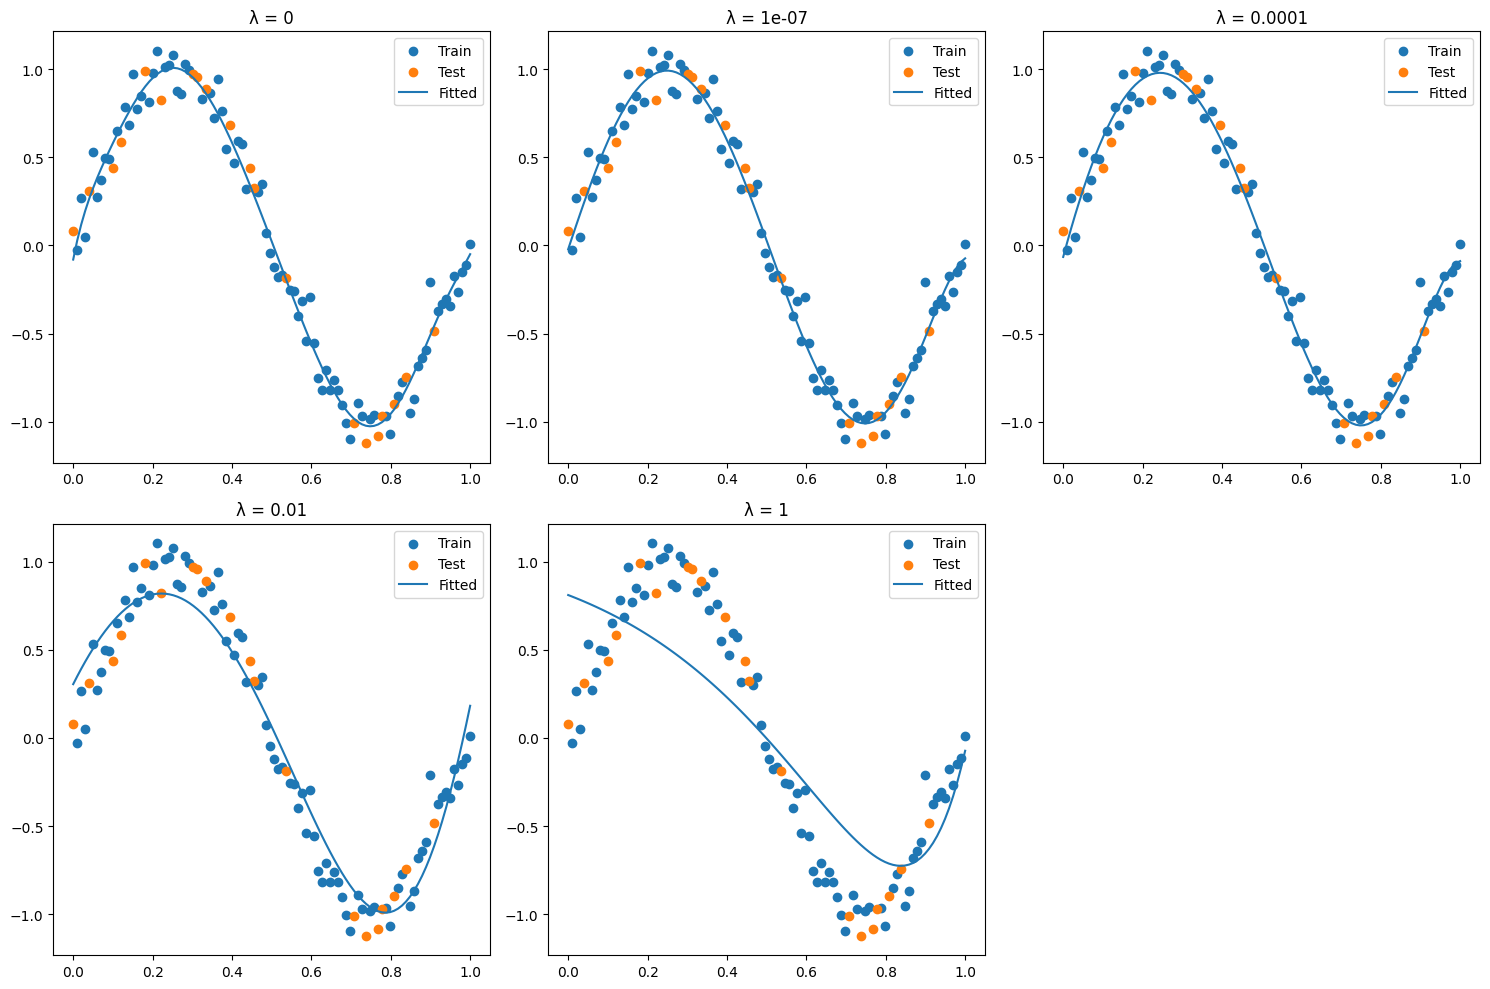

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

########################################
# Generate 20 data points
########################################
#np.random.seed(42) # PLEASE READ : please use this for checking consistency this within bias = true or false!!!
def generate_data(n, with_bias=False): #PLEASE READ : Please toggle to false for no bias distributions
    x = np.linspace(0, 1, n)
    if with_bias:
        t = 5 + np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, n)
    else:
        t = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, n)
    return x, t

# Generate data
x, t = generate_data(20)

# Obtain train and test splits
X_train, X_test, Y_train, Y_test = train_test_split(x, t, test_size=0.5, random_state=42)

########################################
# Fitting Mth degree polynomial using least squares approach
########################################
def PolynomialFit(X_train, Y_train, M, lamda=0):
    # Transform the data using polynomial kernel
    X_poly = np.column_stack([X_train**i for i in range(M+1)])
    
    # Find Pseudo inverse solution
    if lamda == 0:
        w_opt = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ Y_train
    else:
        I = np.eye(M+1)
        I[0,0] = 0  # Don't regularize bias term
        w_opt = np.linalg.inv(X_poly.T @ X_poly + lamda * I) @ X_poly.T @ Y_train
    
    return w_opt

def PolynomialPred(w_est, X):
    X_poly = np.column_stack([X**i for i in range(len(w_est))])
    return X_poly @ w_est

def PolynomialPred_Error(w_est, X, Y):
    Y_pred = PolynomialPred(w_est, X)
    return np.linalg.norm(Y - Y_pred)

# Iterate through range of M values
M_range = list(range(10))
TrError = []
TeError = []

for M in M_range:
    # Fit Mth order polynomial
    w_est = PolynomialFit(X_train, Y_train, M)
    
    # Predict errors on both training and testing data
    train_error = PolynomialPred_Error(w_est, X_train, Y_train)
    test_error = PolynomialPred_Error(w_est, X_test, Y_test)
    
    TrError.append(train_error)
    TeError.append(test_error)

# Plot training and testing estimates along with the original targets
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X_train, Y_train, label='Train')
plt.scatter(X_test, Y_test, label='Test')
x_plot = np.linspace(0, 1, 100)
plt.ylim(-10, 10)
for M in [1, 3, 5, 7, 9]:
    w_est = PolynomialFit(X_train, Y_train, M)
    y_plot = PolynomialPred(w_est, x_plot)
    plt.plot(x_plot, y_plot, label=f'M={M}')
plt.legend()
plt.title('Data and Fitted Polynomials')

# Plot training error vs polynomial order, and testing error vs polynomial order
plt.subplot(122)
plt.plot(M_range, TrError, label='Train Error')
plt.plot(M_range, TeError, label='Test Error')
plt.ylim(0, 50)
plt.xlabel('Polynomial Order')
plt.ylabel('RMSE')
plt.legend()
plt.title('Error vs Polynomial Order')
plt.tight_layout()
plt.show()

########################################
# Increase the size of training data set to 100 points and repeat the experiments
########################################
x_large, t_large = generate_data(100)
X_train_large, X_test_large, Y_train_large, Y_test_large = train_test_split(x_large, t_large, test_size=0.2, random_state=42)

TrError_large = []
TeError_large = []

for M in M_range:
    w_est = PolynomialFit(X_train_large, Y_train_large, M)
    train_error = PolynomialPred_Error(w_est, X_train_large, Y_train_large)
    test_error = PolynomialPred_Error(w_est, X_test_large, Y_test_large)
    TrError_large.append(train_error)
    TeError_large.append(test_error)


plt.plot(M_range, TrError_large, label='Train Error (100 points)')
plt.plot(M_range, TeError_large, label='Test Error (100 points)')
plt.xlabel('Polynomial Order')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()



########################################
# Effect of regularization
########################################
lamdas = [0, 1e-7, 1e-4, 1e-2, 1]

plt.figure(figsize=(15, 10))
for i, lamda in enumerate(lamdas):
    TrError_reg = []
    TeError_reg = []
    for M in M_range:
        w_est = PolynomialFit(X_train_large, Y_train_large, M, lamda)
        train_error = PolynomialPred_Error(w_est, X_train_large, Y_train_large)
        test_error = PolynomialPred_Error(w_est, X_test_large, Y_test_large)
        TrError_reg.append(train_error)
        TeError_reg.append(test_error)
    
    plt.subplot(2, 3, i+1)
    plt.plot(M_range, TrError_reg, label='Train Error')
    plt.plot(M_range, TeError_reg, label='Test Error')
    plt.xlabel('Polynomial Order')
    plt.ylabel('RMSE')
    plt.title(f'λ = {lamda}')
    plt.legend()

plt.tight_layout()
plt.show()

########################################
# Effect of bias regularization
########################################
x_bias, t_bias = generate_data(100, with_bias=False) # PLEASE READ : Please toggle to false for no bias distributions
X_train_bias, X_test_bias, Y_train_bias, Y_test_bias = train_test_split(x_bias, t_bias, test_size=0.2, random_state=42)


plt.figure(figsize=(15, 10))
for i, lamda in enumerate(lamdas):
    w_est = PolynomialFit(X_train_bias, Y_train_bias, 9, lamda)
    y_plot = PolynomialPred(w_est, x_plot)
    
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train_bias, Y_train_bias, label='Train')
    plt.scatter(X_test_bias, Y_test_bias, label='Test')
    plt.plot(x_plot, y_plot, label='Fitted')
    plt.title(f'λ = {lamda}')
    plt.legend()

plt.tight_layout()
plt.show()


<b> Report your observations </b>

1. Having a polynomial order comparable to number of data points causes overfitting, shown in M=9 for the first plot. Decreases train eror but increases test error

2. To counter the above, increase the number of data points( We see fairly good performance till m=9, and overfitting will occur at larger polynomial orders)

3. As \lambda increases, the model becomes more regularized, reducing overfitting. But very large \lambda causes underfitting





Simple Sinusoid Results:


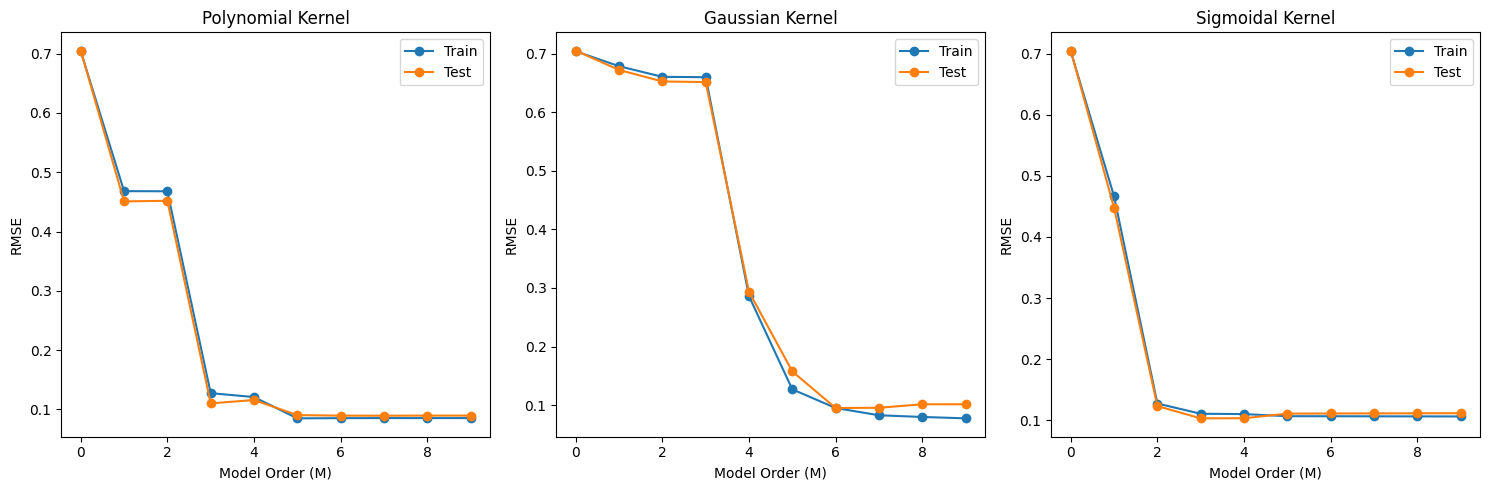


Complex Function Results:


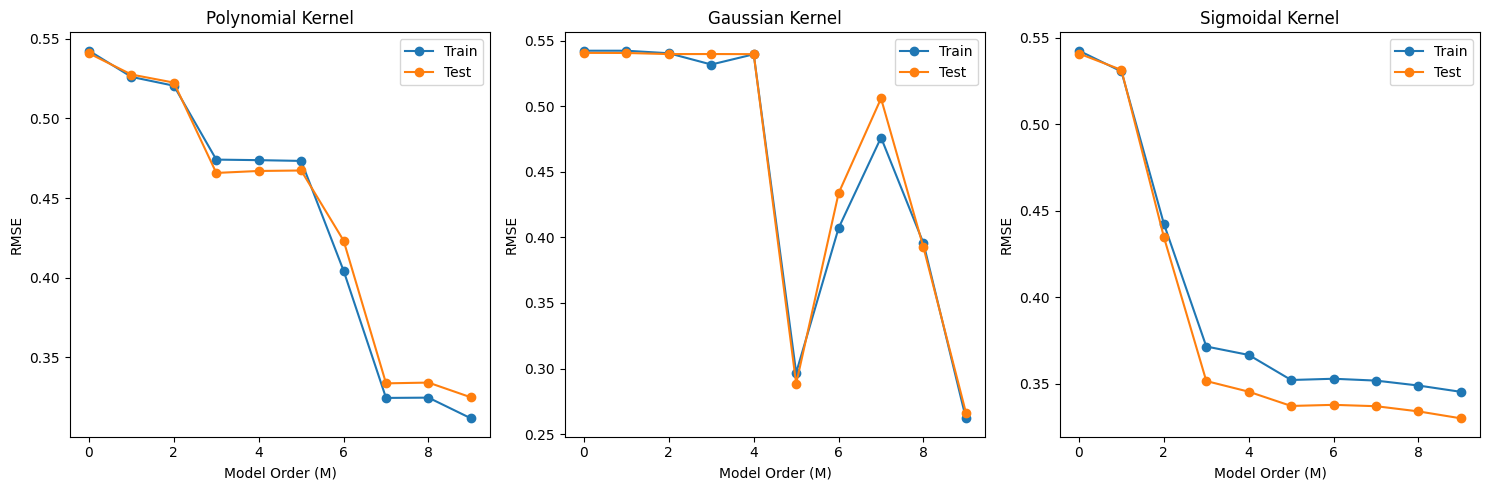

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate 100 data points
def generate_data(n, complex_function=False):
    #np.random.seed(42)
    if not complex_function:
        x = np.linspace(0, 1, n)
        t = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, n)
    else:
        x = np.linspace(0, 3, n)
        t = np.zeros_like(x)
        t[x < 1] = np.sin(2 * np.pi * x[x < 1]) + np.random.normal(0, 0.1, np.sum(x < 1))
        t[(x >= 1) & (x < 2)] = np.abs(2*(x[(x >= 1) & (x < 2)] - 1.5)) + np.random.normal(0, 0.1, np.sum((x >= 1) & (x < 2)))
        t[x >= 2] = np.exp(-10*(x[x >= 2] - 2.5)**2) + np.random.normal(0, 0.1, np.sum(x >= 2))
    return x, t

# Obtain train-test splits
def train_test_split_even_odd(x, t):
    even_mask = np.arange(len(x)) % 2 == 0
    return x[even_mask], x[~even_mask], t[even_mask], t[~even_mask]

# Kernel regression implementation
def KernelRegressionFit(X_train, Y_train, kernelType, M, lamda=1e-6):
    if kernelType == 'polynomial':
        X = np.column_stack([X_train**i for i in range(M+1)])
    elif kernelType == 'gaussian':
        centers = np.linspace(X_train.min(), X_train.max(), M)
        X = np.exp(-(X_train[:, None] - centers)**2/(2*0.1**2))
        X = np.column_stack([np.ones(len(X_train)), X])
    elif kernelType == 'sigmoidal':
        X = 1/(1 + np.exp(-X_train[:, None]*np.linspace(1, 10, M) + np.linspace(0, 5, M)))
        X = np.column_stack([np.ones(len(X_train)), X])
    
    if kernelType != 'polynomial':
        I = np.eye(X.shape[1])
        I[0,0] = 0  # Don't regularize bias term
    else:
        I = np.eye(X.shape[1])
        
    return np.linalg.inv(X.T @ X + lamda*I) @ X.T @ Y_train

def KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernelType):
    if kernelType == 'polynomial':
        M = len(w_est) - 1
        X_tr = np.column_stack([X_train**i for i in range(M+1)])
        X_te = np.column_stack([X_test**i for i in range(M+1)])
    else:
        M = len(w_est) - 1
        if kernelType == 'gaussian':
            centers = np.linspace(X_train.min(), X_train.max(), M)
            X_tr = np.exp(-(X_train[:, None] - centers)**2/(2*0.1**2))
            X_te = np.exp(-(X_test[:, None] - centers)**2/(2*0.1**2))
            X_tr = np.column_stack([np.ones(len(X_train)), X_tr])
            X_te = np.column_stack([np.ones(len(X_test)), X_te])
        elif kernelType == 'sigmoidal':
            X_tr = 1/(1 + np.exp(-X_train[:, None]*np.linspace(1, 10, M) + np.linspace(0, 5, M)))
            X_te = 1/(1 + np.exp(-X_test[:, None]*np.linspace(1, 10, M) + np.linspace(0, 5, M)))
            X_tr = np.column_stack([np.ones(len(X_train)), X_tr])
            X_te = np.column_stack([np.ones(len(X_test)), X_te])
    
    train_error = np.sqrt(np.mean((Y_train - X_tr @ w_est)**2))
    test_error = np.sqrt(np.mean((Y_test - X_te @ w_est)**2))
    return train_error, test_error

# Experiment execution
def run_experiment(complex_function=False):
    x, t = generate_data(100, complex_function)
    X_train, X_test, Y_train, Y_test = train_test_split_even_odd(x, t)
    
    kernels = ['polynomial', 'gaussian', 'sigmoidal']
    M_range = list(range(10)) #PLEASE INCREASE TO OBSERVE THE EFFECT OF OVERFITTING
    results = {k: {'train': [], 'test': []} for k in kernels}
    
    for M in M_range:
        for kernel in kernels:
            try:
                w_est = KernelRegressionFit(X_train, Y_train, kernel, M)
                train_err, test_err = KernelRegressionPred_Error(w_est, X_train, Y_train, X_test, Y_test, kernel)
                results[kernel]['train'].append(train_err)
                results[kernel]['test'].append(test_err)
            except np.linalg.LinAlgError:
                results[kernel]['train'].append(np.nan)
                results[kernel]['test'].append(np.nan)
    
    # Plot results
    plt.figure(figsize=(15,5))
    for i, kernel in enumerate(kernels):
        plt.subplot(1,3,i+1)
        plt.plot(M_range, results[kernel]['train'], marker='o', label='Train')
        plt.plot(M_range, results[kernel]['test'], marker='o', label='Test')
        plt.title(f'{kernel.capitalize()} Kernel')
        plt.xlabel('Model Order (M)')
        plt.ylabel('RMSE')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Run experiments
print("Simple Sinusoid Results:")
run_experiment(complex_function=False)

print("\nComplex Function Results:")
run_experiment(complex_function=True)


<b> Report your observations </b>

1. Performs well for lower orders, but higher orders lead to overfitting( Please increase M_range to observe).

2. Again, Performs well for lower orders but is also less prone to overfitting

3. Performance improves with increasing model order but does not capture the sinusoidal nature compared to above kernels



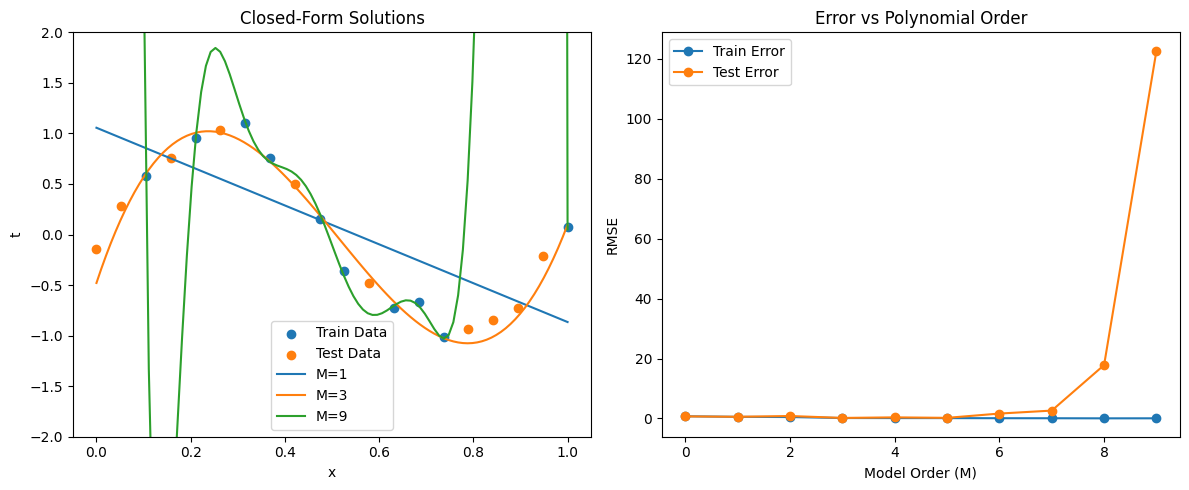


=== Online Training Experiments ===


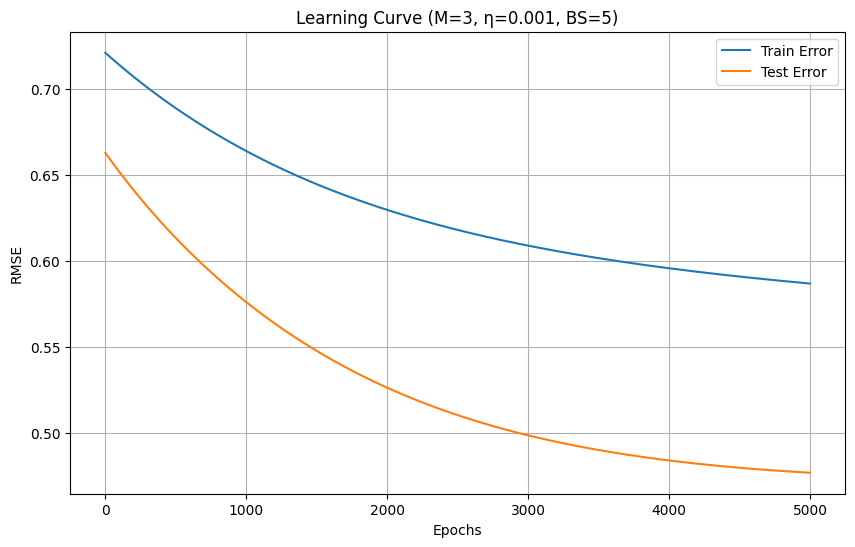

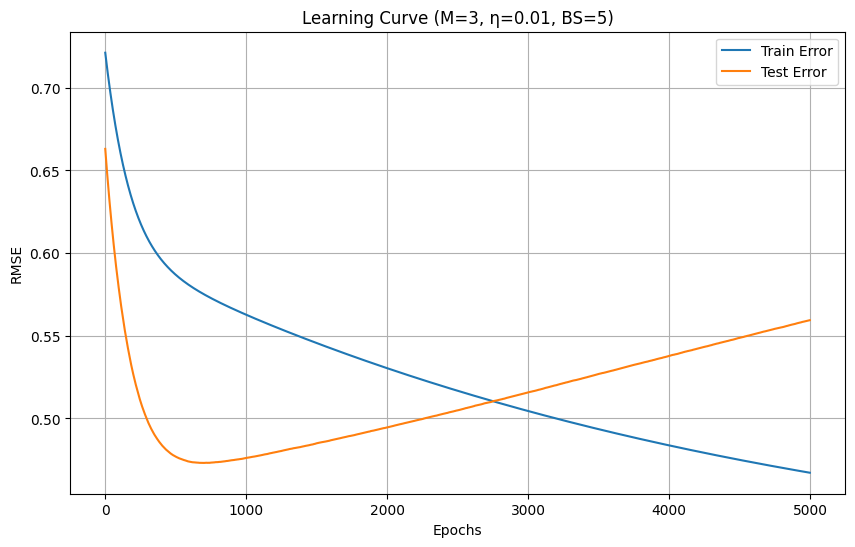

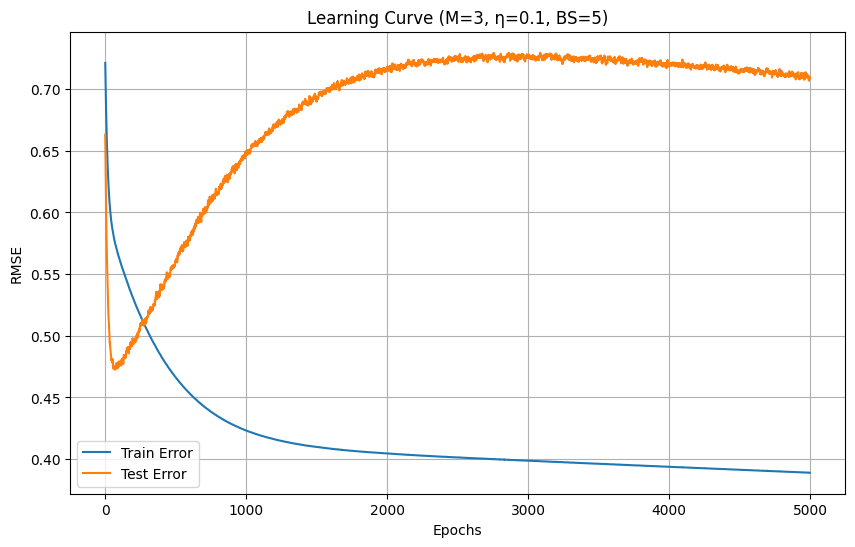

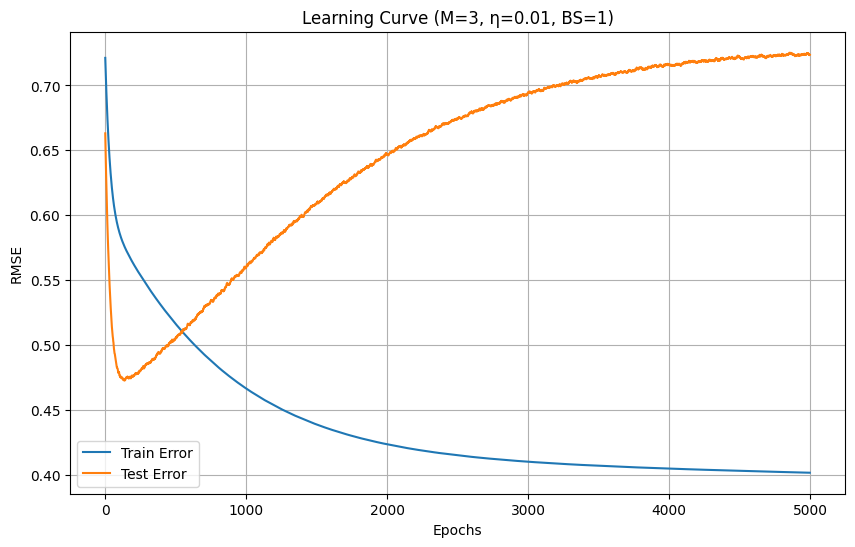

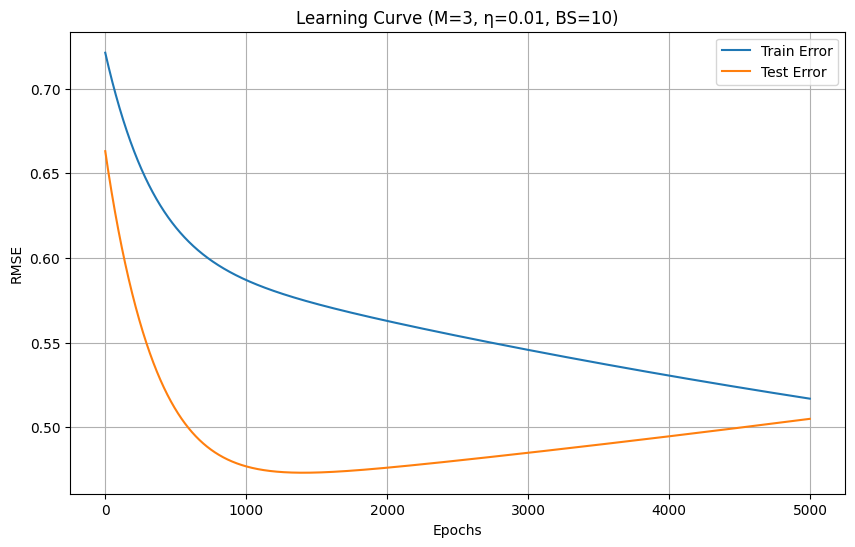

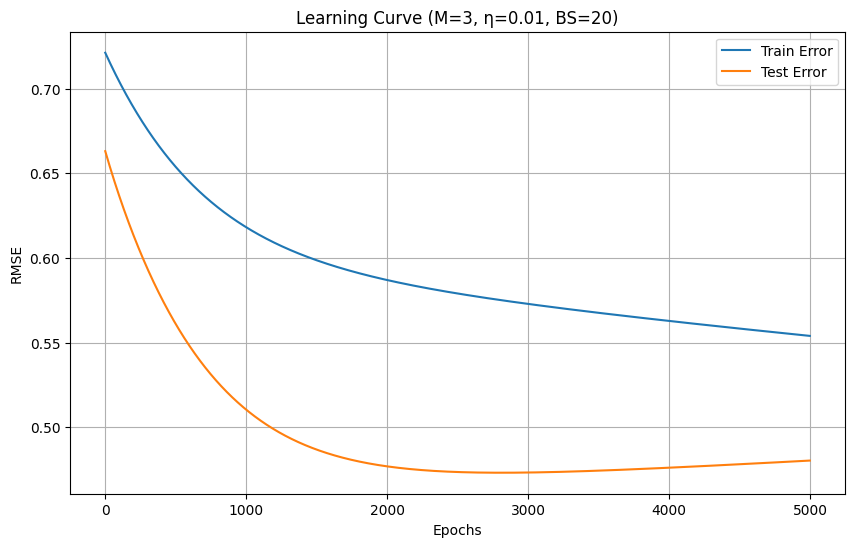

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data
def generate_data(n, with_bias=False):
    x = np.linspace(0, 1, n)
    if with_bias:
        t = 5 + np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, n)
    else:
        t = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, n)
    return x, t

# Polynomial regression functions
def PolynomialFit(X_train, Y_train, M, lamda=0):
    X_poly = np.column_stack([X_train**i for i in range(M+1)])
    I = np.eye(M+1)
    I[0, 0] = 0  # Don't regularize bias term
    return np.linalg.inv(X_poly.T @ X_poly + lamda * I) @ X_poly.T @ Y_train

def PolynomialPred(w_est, X):
    return np.column_stack([X**i for i in range(len(w_est))]) @ w_est

def PolynomialPred_Error(w_est, X, Y):
    return np.sqrt(np.mean((Y - PolynomialPred(w_est, X))**2))

# Online training implementation
def OnlineTraining(X_train, Y_train, X_test, Y_test, M, Epochs=100, BatchSize=10, stepSize=0.01):
    weights = np.zeros(M+1)
    train_errors, test_errors = [], []
    
    for epoch in range(Epochs):
        # Calculate errors
        train_error = PolynomialPred_Error(weights, X_train, Y_train)
        test_error = PolynomialPred_Error(weights, X_test, Y_test)
        train_errors.append(train_error)
        test_errors.append(test_error)
        
        # Shuffle data
        indices = np.random.permutation(len(X_train))
        X_shuffled, Y_shuffled = X_train[indices], Y_train[indices]
        
        # Mini-batch SGD
        for i in range(0, len(X_train), BatchSize):
            X_batch = X_shuffled[i:i+BatchSize]
            Y_batch = Y_shuffled[i:i+BatchSize]
            
            gradient = np.zeros(M+1)
            for x, y in zip(X_batch, Y_batch):
                features = np.array([x**i for i in range(M+1)])
                gradient += (features @ weights - y) * features
                
            weights -= (stepSize/BatchSize) * gradient
            
    # Plot training curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Train Error')
    plt.plot(test_errors, label='Test Error')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.title(f'Learning Curve (M={M}, η={stepSize}, BS={BatchSize})')
    plt.legend()
    plt.grid(True)
    plt.show()
    return weights

# Main experiment
if __name__ == "__main__":
    # Generate and split data
    x, t = generate_data(20)
    X_train, X_test, Y_train, Y_test = train_test_split(x, t, test_size=0.5, random_state=42)
    
    # Closed-form solution analysis
    M_range = list(range(10))
    TrError, TeError = [], []
    
    for M in M_range:
        w = PolynomialFit(X_train, Y_train, M)
        TrError.append(PolynomialPred_Error(w, X_train, Y_train))
        TeError.append(PolynomialPred_Error(w, X_test, Y_test))
    
    # Plot polynomial fits
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.scatter(X_train, Y_train, label='Train Data')
    plt.scatter(X_test, Y_test, label='Test Data')
    
    x_plot = np.linspace(0, 1, 100)
    for M in [1, 3, 9]:
        w = PolynomialFit(X_train, Y_train, M)
        plt.plot(x_plot, PolynomialPred(w, x_plot), label=f'M={M}')
    plt.title('Closed-Form Solutions')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.ylim(-2, 2)
    plt.legend()
    
    # Plot error curves
    plt.subplot(122)
    plt.plot(M_range, TrError, marker='o', label='Train Error')
    plt.plot(M_range, TeError, marker='o', label='Test Error')
    plt.title('Error vs Polynomial Order')
    plt.xlabel('Model Order (M)')
    plt.ylabel('RMSE')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Online training experiments
    print("\n=== Online Training Experiments ===")
    # Effect of step size
    for η in [0.001, 0.01, 0.1]:
        _ = OnlineTraining(X_train, Y_train, X_test, Y_test, 
                          M=3, Epochs=5000, BatchSize=5, stepSize=η)
    
    # Effect of batch size
    for bs in [1, 10, 20]:
        _ = OnlineTraining(X_train, Y_train, X_test, Y_test,
                          M=3, Epochs=5000, BatchSize=bs, stepSize=0.01)


<b> Report your observations </b>

1. Smaller step sizes result in slower convergence but more stable weight updates.

2. Smaller batch sizes lead to noisier updates but faster convergence due to frequent updates.

3. Larger step sizes converge faster but oscillates around the minimum and larger batch sizes result in good convergence but slower update.

 



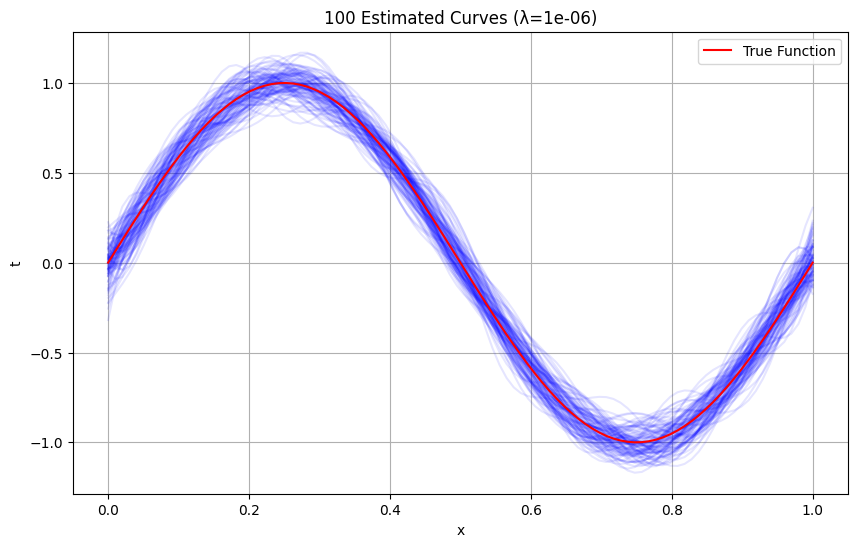

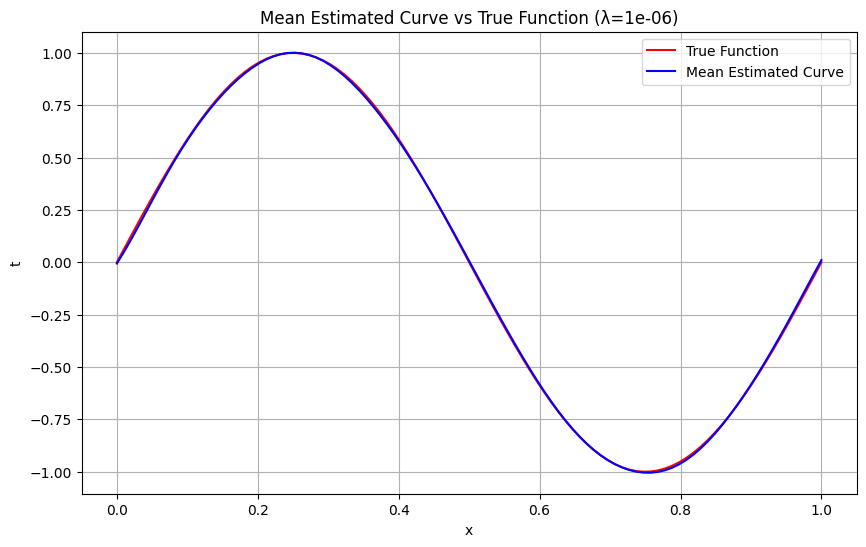

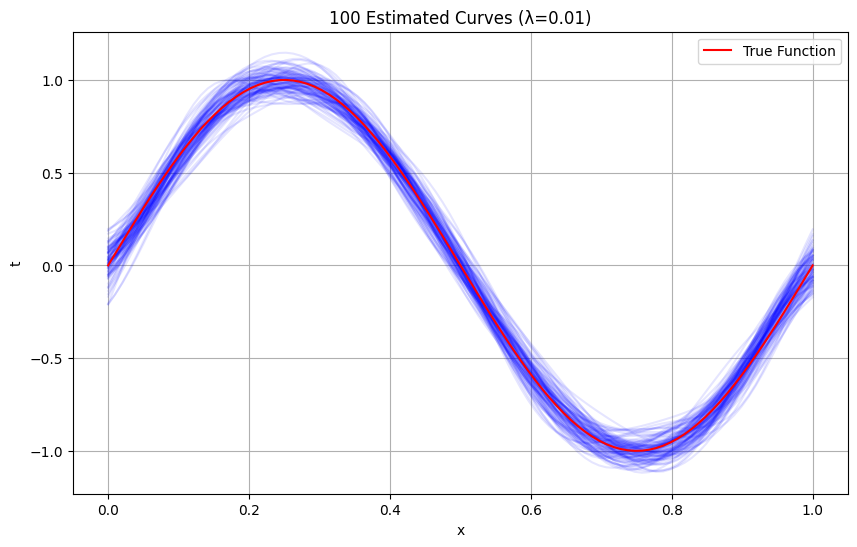

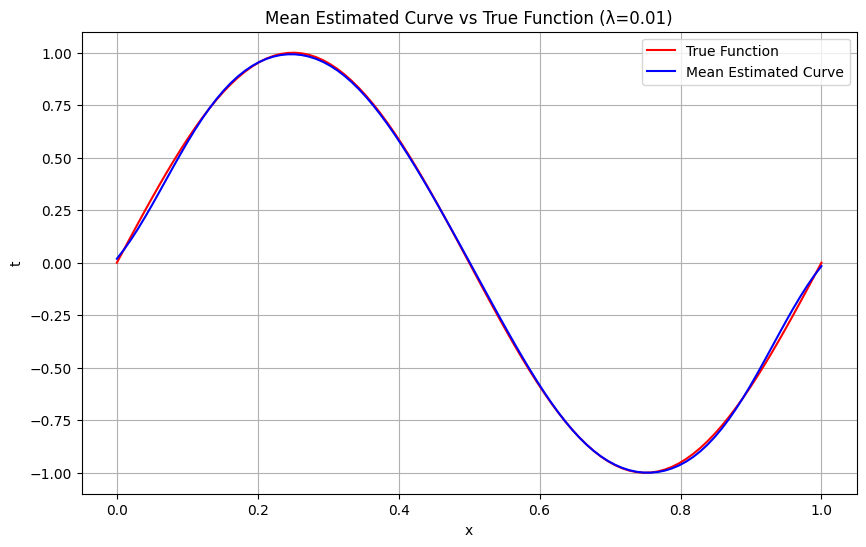

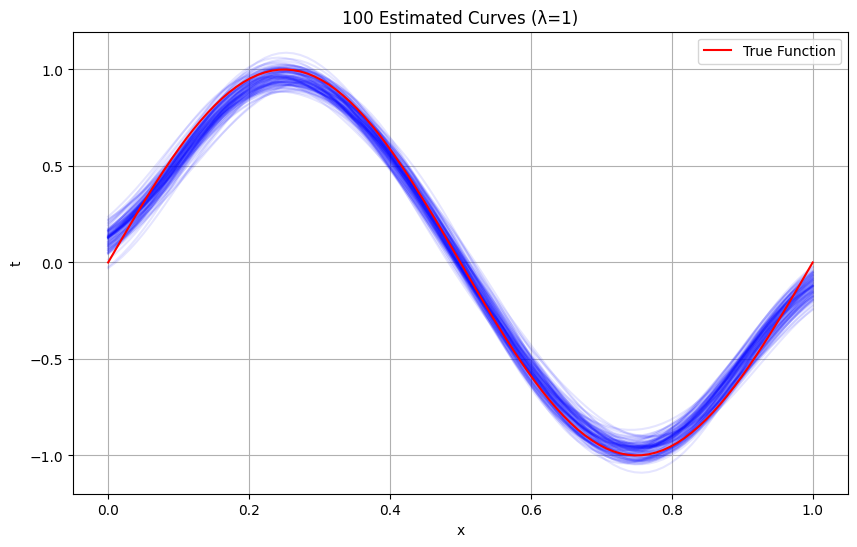

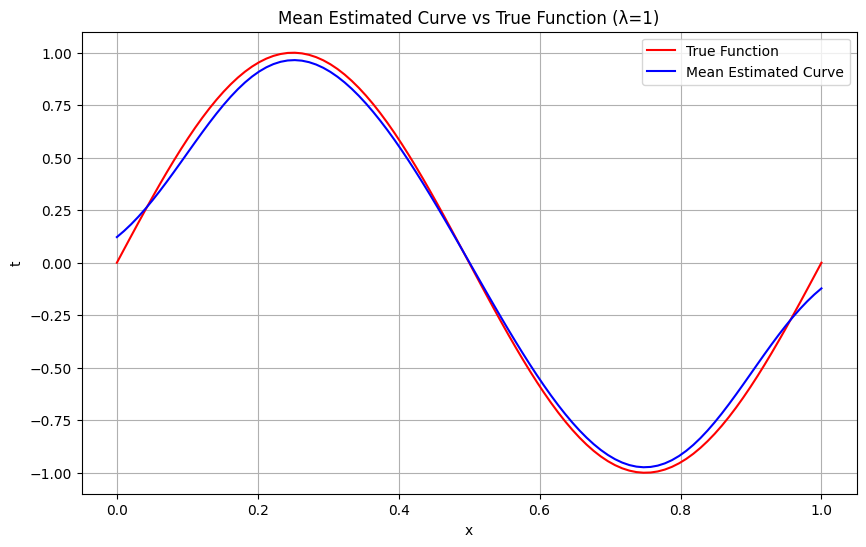

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 datasets of noisy sinusoidal data
def generate_datasets(L, N):
    datasets = []
    x = np.linspace(0, 1, N)
    for _ in range(L):
        noise = np.random.normal(0, 0.1, N)
        t = np.sin(2 * np.pi * x) + noise
        datasets.append((x, t))
    return datasets

# Gaussian basis functions (updated with new formula)
def gaussian_basis_functions(x, centers, width):
    return np.exp(-((x[:, None] - centers[None, :])**2) / (2 * width**2))

# Regularized least squares fitting
def fit_regularized_least_squares(x, t, centers, width, lamda):
    Phi = gaussian_basis_functions(x, centers, width)
    Phi = np.column_stack([np.ones(len(x)), Phi])  # Add bias term
    I = np.eye(Phi.shape[1])
    I[0, 0] = 0  # Do not regularize the bias term
    w = np.linalg.inv(Phi.T @ Phi + lamda * I) @ Phi.T @ t
    return w

# Prediction function
def predict(w, x, centers, width):
    Phi = gaussian_basis_functions(x, centers, width)
    Phi = np.column_stack([np.ones(len(x)), Phi])  # Add bias term
    return Phi @ w

# Generate datasets
L = 100  # Number of datasets
N = 25   # Number of datapoints per dataset
datasets = generate_datasets(L, N)

# Parameters for Gaussian basis functions
M = 24  # Number of Gaussian basis functions (25th-order model with bias)
centers = np.linspace(0, 1, M)
width = 0.1

# Regularization coefficients (low, middle, high)
regularization_coefficients = [1e-6, 1e-2, 1]

# Store weights for each regularization coefficient
weights_by_lambda = {}
for lamda in regularization_coefficients:
    weights = []
    for x, t in datasets:
        w = fit_regularized_least_squares(x, t, centers, width, lamda)
        weights.append(w)
    weights_by_lambda[lamda] = weights

# Visualization
x_plot = np.linspace(0, 1, 100)

for lamda in regularization_coefficients:
    weights = weights_by_lambda[lamda]
    
    # Plot 100 estimated curves
    plt.figure(figsize=(10, 6))
    for w in weights:
        y_plot = predict(w, x_plot, centers, width)
        plt.plot(x_plot, y_plot, color='blue', alpha=0.1)
    plt.plot(x_plot, np.sin(2 * np.pi * x_plot), color='red', label='True Function')
    plt.title(f'100 Estimated Curves (λ={lamda})')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot mean of the estimated curves alongside the true function
    mean_curve = np.mean([predict(w, x_plot, centers, width) for w in weights], axis=0)
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, np.sin(2 * np.pi * x_plot), color='red', label='True Function')
    plt.plot(x_plot, mean_curve, color='blue', label='Mean Estimated Curve')
    plt.title(f'Mean Estimated Curve vs True Function (λ={lamda})')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.legend()
    plt.grid(True)
    plt.show()


<b> Report your observations </b>

1. Low regularization leads to overfitting (low bias - high variance).

2. High regularization leads to underfitting (high bias - low variance).

3. Moderate regularization achieves a balance between bias and variance.





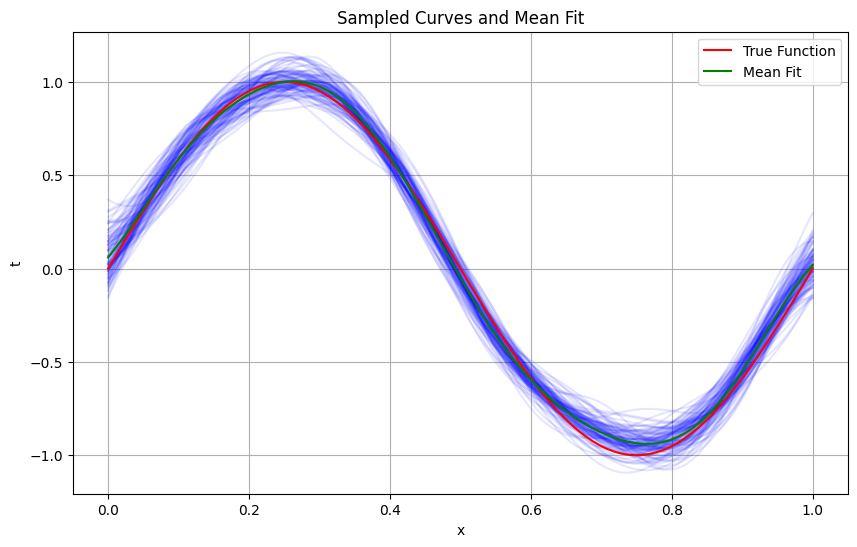

x=0.20, Predictive Mean=0.9373, Variance=0.0437
x=0.50, Predictive Mean=-0.0422, Variance=0.0436
x=0.80, Predictive Mean=-0.9158, Variance=0.0437


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy sinusoidal data
def generate_noisy_sinusoidal_data(N):
    x = np.linspace(0, 1, N)
    t = np.sin(2 * np.pi * x) + np.random.normal(0, 0.1, N)
    return x, t

# Gaussian basis functions
def gaussian_basis_functions(x, centers, width):
    return np.exp(-0.5 * ((x[:, None] - centers[None, :])**2) / width**2)

# Bayesian sequential updates for posterior statistics
def bayesian_updates(X_train, Y_train, M, alpha=1.0, beta=25.0):
    centers = np.linspace(0, 1, M)
    width = 0.1
    Phi = gaussian_basis_functions(X_train, centers, width)
    Phi = np.column_stack([np.ones(len(X_train)), Phi])  # Add bias term
    
    # Initialize prior parameters
    S_0 = alpha * np.eye(M+1)  # Prior covariance matrix
    m_0 = np.zeros(M+1)        # Prior mean vector
    
    # Sequential updates
    S_N = S_0
    m_N = m_0
    for i in range(len(X_train)):
        phi_n = Phi[i:i+1].T  # Single data point's feature vector
        t_n = Y_train[i]
        S_N_inv = np.linalg.inv(S_N)
        S_N = np.linalg.inv(S_N_inv + beta * phi_n @ phi_n.T)
        m_N = S_N @ (S_N_inv @ m_N + beta * phi_n.flatten() * t_n)
    
    return m_N, S_N

# Sample weight vectors from posterior and estimate average fit
def sample_and_average_fit(m_N, S_N, X_plot, M):
    centers = np.linspace(0, 1, M)
    width = 0.1
    Phi_plot = gaussian_basis_functions(X_plot, centers, width)
    Phi_plot = np.column_stack([np.ones(len(X_plot)), Phi_plot])  # Add bias term
    
    sampled_curves = []
    for _ in range(100):  # Sample 100 weight vectors
        w_sampled = np.random.multivariate_normal(m_N, S_N)
        y_sampled = Phi_plot @ w_sampled
        sampled_curves.append(y_sampled)
    
    mean_fit = np.mean(sampled_curves, axis=0)
    
    # Plot sampled curves and mean fit
    plt.figure(figsize=(10, 6))
    for curve in sampled_curves:
        plt.plot(X_plot, curve, color='blue', alpha=0.1)
    plt.plot(X_plot, np.sin(2 * np.pi * X_plot), color='red', label='True Function')
    plt.plot(X_plot, mean_fit, color='green', label='Mean Fit')
    plt.title('Sampled Curves and Mean Fit')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.legend()
    plt.grid(True)
    plt.show()

# Predictive distribution analysis
def predictive_distribution_analysis(X_train, Y_train, X_test_point, M):
    centers = np.linspace(0, 1, M)
    width = 0.1
    
    Phi_train = gaussian_basis_functions(X_train, centers, width)
    Phi_train = np.column_stack([np.ones(len(X_train)), Phi_train])  # Add bias term
    
    phi_test_point = gaussian_basis_functions(np.array([X_test_point]), centers, width)
    phi_test_point = np.column_stack([np.ones(1), phi_test_point])  # Add bias term
    
    # Prior parameters
    alpha = 1.0
    beta = 25.0
    S_0 = alpha * np.eye(M+1)
    
    # Posterior parameters after training on all data points
    S_N_inv = np.linalg.inv(S_0) + beta * Phi_train.T @ Phi_train
    S_N = np.linalg.inv(S_N_inv)
    
    m_0 = np.zeros(M+1)
    
    m_N = S_N @ (np.linalg.inv(S_0) @ m_0 + beta * Phi_train.T @ Y_train)
    
    # Predictive mean and variance
    pred_mean = phi_test_point @ m_N
    pred_var = (1 / beta) + phi_test_point @ S_N @ phi_test_point.T
    
    return pred_mean.flatten(), pred_var.flatten()

# Main experiment for MAP estimation and predictive distribution analysis
if __name__ == "__main__":
    
    # Generate data and split into training/testing sets
    N_train = 100
    X_train, Y_train = generate_noisy_sinusoidal_data(N_train)
    
    X_plot = np.linspace(0, 1, 100)  # For plotting
    
    # Fit a 20th-order model with Gaussian basis functions using Bayesian updates
    M_order = 20
    m_N_posterior, S_N_posterior = bayesian_updates(X_train,
                                                    Y_train,
                                                    M=M_order,
                                                    alpha=1.0,
                                                    beta=25.0)

   ### Part B: Sampling and Averaging ###
sample_and_average_fit(m_N_posterior,
                          S_N_posterior,
                          X_plot,
                          M_order)

   ### Part C: Predictive Distribution Analysis ###
test_points = [0.2, 0.5, 0.8]
for x_test in test_points:
       pred_mean, pred_var = predictive_distribution_analysis(
           X_train,
           Y_train,
           x_test,
           M_order,
       )
       print(f"x={x_test:.2f}, Predictive Mean={pred_mean[0]:.4f}, Variance={pred_var[0]:.4f}")


<b> Report your observations </b>

1. The mean curve(fit) converges to the original function

2.

3.

